In [ ]:
!pip install psycopg2

In [ ]:
!pip install boto3

In [ ]:
!pip install tabulate

In [ ]:
import psycopg2
import numpy as np
import pandas as pd
import boto3

# Importação da biblioteca específica para conexão com o Redshift:

Importa a biblioteca psycopg2, um adaptador PostgreSQL para Python.
Definição dos parâmetros de conexão:

Define os parâmetros, como endereço do servidor (host), porta (port), nome do banco de dados (database), nome de usuário (user), e senha (password). Esses valores devem ser substituídos pelos corretos.
Conexão com o banco de dados:

Estabelece a conexão utilizando os parâmetros definidos anteriormente.
Criação de um cursor:

Cria um cursor, um objeto usado para interagir com o banco de dados.
Execução da consulta SQL:

Define uma consulta SQL para selecionar todos os dados da tabela dados_api_parceiro_g05 e a executa usando o cursor.
Recuperação dos resultados:

Recupera os resultados da consulta usando o método fetchall() e imprime na tela.
Encerramento da conexão (comentado):

As linhas que fecham o cursor e a conexão estão comentadas, mas é uma prática recomendada fechá-los quando não são mais necessários.

In [ ]:
import psycopg2

# Replace these values with your own Redshift cluster details
host = 'default-workgroup.374171957244.us-east-1.redshift-serverless.amazonaws.com'
port = '5439'
database = 'group5'
user = 'admin'
password = 'Inteli90'

conn = psycopg2.connect(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

cursor = conn.cursor()

query = 'SELECT * FROM dados_api_parceiro_g05 '

cursor.execute(query)

results = cursor.fetchall()
print(results)

# cursor.close()
# conn.close()

[(12139, 11418228000201, 3, 'Vinho', datetime.datetime(2023, 4, 23, 0, 0), 589.0, 98), (12140, 41326845000159, 7, 'Feijão', datetime.datetime(2023, 4, 23, 0, 0), 591.0, 83), (12141, 20411431000158, 12, 'Pão de Forma', datetime.datetime(2023, 4, 23, 0, 0), 914.0, 70), (12142, 5659670000138, 5, 'Ketchup', datetime.datetime(2023, 4, 23, 0, 0), 986.0, 16), (12143, 38255950000130, 23, 'Tupperware', datetime.datetime(2023, 4, 23, 0, 0), 532.0, 71), (12144, 30710155000182, 20, 'Tênis', datetime.datetime(2023, 4, 23, 0, 0), 107.0, 75), (12145, 44487011000113, 25, 'Sofá', datetime.datetime(2023, 4, 23, 0, 0), 429.0, 16), (12146, 660029000108, 23, 'Tupperware', datetime.datetime(2023, 4, 23, 0, 0), 628.0, 76), (12147, 20513459000104, 8, 'Macarrão', datetime.datetime(2023, 4, 23, 0, 0), 293.0, 56), (12148, 14898846000103, 16, 'Açucar', datetime.datetime(2023, 4, 23, 0, 0), 897.0, 48), (12149, 35883553000114, 3, 'Vinho', datetime.datetime(2023, 4, 23, 0, 0), 117.0, 53), (12150, 26412428000135, 18,

# Subindo as fontes de dados como Dataframes

In [ ]:
columns_api_parceiro = ["ID", "CNPJ", "Quantidade", "Produto", "Data", "Preço", "Valor"]


df_dados_da_api = pd.DataFrame(results, columns=columns_api_parceiro)
df_dados_da_api

,ID,CNPJ,Quantidade,Produto,Data,Preço,Valor
0,12139,11418228000201,3,Vinho,2023-04-23,589.0,98
1,12140,41326845000159,7,Feijão,2023-04-23,591.0,83
2,12141,20411431000158,12,Pão de Forma,2023-04-23,914.0,70
3,12142,5659670000138,5,Ketchup,2023-04-23,986.0,16
4,12143,38255950000130,23,Tupperware,2023-04-23,532.0,71
...,...,...,...,...,...,...,...
33023,24534,35719231000134,24,Livro,2023-08-24,90.0,68
33024,24535,40490789000120,10,Batata Palha,2023-08-24,607.0,98
33025,24536,39512287000174,6,Oleo,2023-08-24,284.0,13
33026,24537,45510205000155,13,Detergente,2023-08-24,539.0,78


In [ ]:
query_bacen = 'SELECT * FROM dados_financeiros_bacen_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_bacen)

# Fetch the results
query_bacen = cursor.fetchall()

columns_bacen = ["Data", "USD", "Taxa_selic", "Taxa_Exp_Inflacao"]

df_dados_bacen = pd.DataFrame(query_bacen, columns=columns_bacen)
df_dados_bacen

,Data,USD,Taxa_selic,Taxa_Exp_Inflacao
0,2000-10-18,1.8787,0.0,0.0
1,2000-10-19,1.8706,0.0,0.0
2,2000-10-20,1.8788,0.0,0.0
3,2000-10-23,1.8910,0.0,0.0
4,2000-10-24,1.8973,0.0,0.0
...,...,...,...,...
7579,2019-07-02,3.8558,6.5,0.0
7580,2019-07-03,3.8469,6.5,0.0
7581,2019-07-04,3.7934,6.5,0.0
7582,2019-07-05,3.8198,6.5,0.0


In [ ]:
df_dados_bacen

,Data,USD,Taxa_selic,Taxa_Exp_Inflacao
0,2000-10-18,1.8787,0.0,0.0
1,2000-10-19,1.8706,0.0,0.0
2,2000-10-20,1.8788,0.0,0.0
3,2000-10-23,1.8910,0.0,0.0
4,2000-10-24,1.8973,0.0,0.0
...,...,...,...,...
7579,2019-07-02,3.8558,6.5,0.0
7580,2019-07-03,3.8469,6.5,0.0
7581,2019-07-04,3.7934,6.5,0.0
7582,2019-07-05,3.8198,6.5,0.0


In [ ]:
query_ibge = 'SELECT * FROM dados_ibge_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_ibge)

# Fetch the results
query_ibge = cursor.fetchall()

columns_ibge = ["nome_uf", "nome_municipio", "esfera_gov_escola", "localizacao_escola", "inep_escola", "nome_escola", "quant_alunado", " valor_recebido", "__index_level_0__"]

df_dados_ibge = pd.DataFrame(query_ibge, columns=columns_ibge)
df_dados_ibge

,nome_uf,nome_municipio,esfera_gov_escola,localizacao_escola,inep_escola,nome_escola,quant_alunado,valor_recebido,__index_level_0__
0,RJ,RIO DE JANEIRO,ESTADUAL,Urbana,33000026.0,CE GOVERNADOR ROBERTO SILVEIRA,140.0,"R$ 37.473,00",6338
1,RJ,NATIVIDADE,MUNICIPAL,Urbana,33003408.0,COLEGIO MUNICIPAL ALVORADA,100.0,"R$ 11.268,00",6339
2,RJ,CAMPOS DOS GOYTACAZES,MUNICIPAL,Urbana,33008175.0,CIEP BRIZOLAO 144 PROFESSORA CARMEM SYLVIA CAR...,300.0,"R$ 40.440,00",6340
3,RJ,CAMPOS DOS GOYTACAZES,MUNICIPAL,Urbana,33008248.0,CENTRO EDUCACIONAL MUNICIPAL DO SINDICATO DOS ...,592.0,"R$ 20.208,00",6341
4,RJ,RIO DE JANEIRO,ESTADUAL,Urbana,33008418.0,CE DOUTOR FELIX MIRANDA,701.0,"R$ 81.477,00",6342
...,...,...,...,...,...,...,...,...,...
6900,PA,AGUA AZUL DO NORTE,MUNICIPAL,Rural,15123987.0,E M E F MARECHAL RONDON,349.0,"R$ 17.175,00",695
6901,PA,CURIONOPOLIS,MUNICIPAL,Urbana,15124592.0,E M E F JOSE RODRIGUES,300.0,"R$ 56.085,00",696
6902,PA,CURIONOPOLIS,MUNICIPAL,Rural,15124681.0,ESCOLA MUNICIPAL DE ENSINO FUNDAMENTAL ANGELA ...,150.0,"R$ 41.115,00",697
6903,PA,ELDORADO DOS CARAJAS,MUNICIPAL,Urbana,15124762.0,E M E F FRANCILANDIA,160.0,"R$ 32.640,00",698


## Dados POF

In [ ]:
query_pof_aluguel_estimado = 'SELECT * FROM pof_aluguel_estimado_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_aluguel_estimado)

# Fetch the results
query_pof_aluguel_estimado = cursor.fetchall()

columns_pof_aluguel_estimado = ["id", "uf", "estrato_pof", "tipo_situacao_reg", "cod_upa", "num_dom", "num_uc", "quadro", "v9001", "v9002", "v8000", "v9010", "v9011", "deflator", "v8000_defla", "cod_imput_valor", "fator_anualizacao", "peso", "peso_final", "renda_total"]

df_dados_pof_aluguel_estimado = pd.DataFrame(query_pof_aluguel_estimado, columns=columns_pof_aluguel_estimado)
df_dados_pof_aluguel_estimado

,id,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,quadro,v9001,v9002,v8000,v9010,v9011,deflator,v8000_defla,cod_imput_valor,fator_anualizacao,peso,peso_final,renda_total
0,44609,Mato Grosso,5105,1,510027449,1,1,0,101,11,300.0,6,12,1.025054,307.52,0,1,249.211854,369.828617,1372.83
1,44610,Mato Grosso,5105,1,510027449,2,1,0,101,11,300.0,6,12,1.025120,307.54,0,1,249.211854,369.828617,7082.42
2,44611,Mato Grosso,5105,1,510027449,3,1,0,101,11,600.0,6,12,1.025054,615.03,0,1,249.211854,369.828617,1823.26
3,44612,Mato Grosso,5105,1,510027449,4,1,0,101,11,600.0,7,12,1.023682,614.21,0,1,249.211854,369.828617,2679.09
4,44613,Mato Grosso,5105,1,510027449,5,1,0,101,11,600.0,7,12,1.023625,614.17,0,1,249.211854,369.828617,2799.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48930,29002,Espírito Santo,3204,1,320062347,7,1,0,101,11,500.0,4,12,0.992573,496.29,0,1,345.726421,452.382257,2478.09
48931,29003,Espírito Santo,3204,1,320062347,9,1,0,101,11,500.0,5,12,0.990540,495.27,0,1,345.726421,452.382257,3466.62
48932,29004,Espírito Santo,3204,1,320062347,11,1,0,101,11,600.0,5,12,0.984338,590.60,0,1,345.726421,452.382257,4379.57
48933,29005,Espírito Santo,3204,1,320062347,12,1,0,101,11,1000.0,6,12,0.980179,980.18,0,1,345.726421,452.382257,1217.59


In [ ]:
# pof_caderneta_coletiva_g05

query_pof_caderneta_coletiva_g05 = 'SELECT * FROM pof_caderneta_coletiva_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_caderneta_coletiva_g05)

# Fetch the results
query_pof_caderneta_coletiva_g05 = cursor.fetchall()

columns_caderneta_coletiva = ["id", "uf", "estrato_pof", "tipo_situacao_reg", "cod_upa", "num_dom", "num_uc", "quadro", "seq", "v9001", "v9002", "v8000", "deflator", "v8000_defla", "cod_imput_valor", "fator_anualizacao", "peso", "peso_final", "renda_total", "v9005", "v9007", "v9009", "qtd_final", "v9004"]

df_dados_caderneta = pd.DataFrame(query_pof_caderneta_coletiva_g05, columns=columns_caderneta_coletiva)
df_dados_caderneta

,id,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,quadro,seq,v9001,...,cod_imput_valor,fator_anualizacao,peso,peso_final,renda_total,v9005,v9007,v9009,qtd_final,v9004
0,5200,Rondônia,1102,1,110020158,7,1,68,9,6400101,...,0,52,395.921836,607.977246,6491.69,1.388,4803.0,NAO INFORMADO,1.388,101
1,5201,Rondônia,1102,1,110020158,7,1,68,10,6401101,...,0,52,395.921836,607.977246,6491.69,1.399,4803.0,NAO INFORMADO,1.399,101
2,5202,Rondônia,1102,1,110020158,7,1,68,11,7008401,...,0,52,395.921836,607.977246,6491.69,1.0,1901.0,NAO INFORMADO,0.268,101
3,5203,Rondônia,1102,1,110020158,7,1,68,12,8202502,...,0,52,395.921836,607.977246,6491.69,1.0,1901.0,NAO INFORMADO,0.809,101
4,5204,Rondônia,1102,1,110020158,7,1,68,13,6300113,...,0,52,395.921836,607.977246,6491.69,1.0,1301.0,NAO INFORMADO,3.901,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789990,785495,Distrito Federal,5304,1,530040840,5,1,65,1,7800201,...,0,52,444.038390,543.831331,547.61,1.0,1901.0,NAO INFORMADO,2.088,509
789991,785496,Distrito Federal,5304,1,530040840,6,1,69,1,7800203,...,0,52,444.038390,543.831331,1842.29,2268.0,4502.0,NAO INFORMADO,2.268,101
789992,785497,Distrito Federal,5304,1,530040840,6,1,69,2,8500205,...,0,52,444.038390,543.831331,1842.29,1160.0,4502.0,NAO INFORMADO,1.16,101
789993,785498,Distrito Federal,5304,1,530040840,6,1,69,3,7101202,...,0,52,444.038390,543.831331,1842.29,1.064,4803.0,NAO INFORMADO,1.064,101


In [ ]:
query_pof_despesa_coletiva_g05 = 'SELECT * FROM pof_despesa_coletiva_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_despesa_coletiva_g05)

# Fetch the results
query_pof_despesa_coletiva_g05 = cursor.fetchall()

column_despesa_coletiva_g05 = [
    'unnamed: 0', 'uf', 'estrato_pof', 'tipo_situacao_reg', 'cod_upa', 'num_dom', 'num_uc',
    'quadro', 'seq', 'v9001', 'v9002', 'v9005', 'v8000', 'v9010', 'v9011', 'v9012', 'v1904',
    'v1905', 'deflator', 'v8000_defla', 'v1904_defla', 'cod_imput_valor', 'cod_imput_quantidade',
    'fator_anualizacao', 'peso', 'peso_final', 'renda_total', 'v9004'
]

df_dados_despesa_coletiva = pd.DataFrame(query_pof_despesa_coletiva_g05, columns=column_despesa_coletiva_g05)
df_dados_despesa_coletiva

,unnamed: 0,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,quadro,seq,v9001,...,deflator,v8000_defla,v1904_defla,cod_imput_valor,cod_imput_quantidade,fator_anualizacao,peso,peso_final,renda_total,v9004
0,10900,Acre,1201,1,120004860,3,1,17,35,1703601,...,0.9513717052,570.82,NAO INFORMADO,0,NAO INFORMADO,1,134.039577,195.883534,2746.84,2101.0
1,10901,Acre,1201,1,120004860,4,1,6,0,600101,...,0.8817048943,193.08,NAO INFORMADO,0,0.0,12,134.039577,195.883534,8206.12,NAO INFORMADO
2,10902,Acre,1201,1,120004860,4,1,6,1,600201,...,1.0843039773,49.34,NAO INFORMADO,0,NAO INFORMADO,12,134.039577,195.883534,8206.12,NAO INFORMADO
3,10903,Acre,1201,1,120004860,4,1,6,5,600601,...,1.0,90.00,NAO INFORMADO,0,NAO INFORMADO,12,134.039577,195.883534,8206.12,NAO INFORMADO
4,10904,Acre,1201,1,120004860,4,1,6,7,600801,...,0.9948766603,221.26,NAO INFORMADO,0,NAO INFORMADO,12,134.039577,195.883534,8206.12,NAO INFORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478567,471495,Distrito Federal,5308,2,530026906,1,1,17,15,1701601,...,0.9577080491,1770.10,NAO INFORMADO,1,NAO INFORMADO,1,242.096552,296.505196,5628.55,4401.0
478568,471496,Distrito Federal,5308,2,530026906,1,1,18,3,1800401,...,1.0285687784,154.29,NAO INFORMADO,0,NAO INFORMADO,1,242.096552,296.505196,5628.55,10601.0
478569,471497,Distrito Federal,5308,2,530026906,1,1,18,6,1800701,...,1.0940022567,54.70,NAO INFORMADO,0,NAO INFORMADO,1,242.096552,296.505196,5628.55,4011.0
478570,471498,Distrito Federal,5308,2,530026906,2,1,7,0,700101,...,1.0290701083,66.89,NAO INFORMADO,0,NAO INFORMADO,4,242.096552,296.505196,2234.29,2007.0


In [ ]:
query_pof_despesa_individual_g05 = 'SELECT * FROM pof_despesa_individual_g05 limit 50000'

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_despesa_individual_g05)

# Fetch the results
query_pof_despesa_individual_g05 = cursor.fetchall()

column_despesa_individual_g05 = [
    'unnamed: 0', 'uf', 'estrato_pof', 'tipo_situacao_reg', 'cod_upa', 'num_dom', 'num_uc',
    'cod_informante', 'quadro', 'seq', 'v9001', 'v9002', 'v8000', 'v9010', 'v9011', 'v9012',
    'v4104', 'v4105', 'deflator', 'v8000_defla', 'cod_imput_valor', 'fator_anualizacao',
    'peso', 'peso_final', 'renda_total', 'v9004'
]

df_dados_despesa_individual = pd.DataFrame(query_pof_despesa_individual_g05, columns=column_despesa_individual_g05)
df_dados_despesa_individual

,unnamed: 0,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,cod_informante,quadro,seq,...,v4104,v4105,deflator,v8000_defla,cod_imput_valor,fator_anualizacao,peso,peso_final,renda_total,v9004
0,10900,Rondônia,1108,2,110004444,14,1,1,30,1,...,NAO INFORMADO,NAO INFORMADO,1.0361534686,9.33,0,12,211.431781,324.674469,1197.56,101.0
1,10901,Rondônia,1108,2,110004444,14,1,1,30,2,...,NAO INFORMADO,NAO INFORMADO,0.9694242875,4.85,0,12,211.431781,324.674469,1197.56,101.0
2,10902,Rondônia,1108,2,110004444,14,1,1,30,6,...,NAO INFORMADO,NAO INFORMADO,0.9991620714,19.98,0,12,211.431781,324.674469,1197.56,6804.0
3,10903,Rondônia,1108,2,110004444,14,1,1,30,10,...,NAO INFORMADO,NAO INFORMADO,1.0009024351,9.01,0,12,211.431781,324.674469,1197.56,101.0
4,10904,Rondônia,1108,2,110004444,14,1,1,31,0,...,NAO INFORMADO,NAO INFORMADO,0.981923964,9.82,0,4,211.431781,324.674469,1197.56,NAO INFORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,568907,Pernambuco,2613,1,260113181,13,1,1,24,34,...,NAO INFORMADO,NAO INFORMADO,1.0007028463,11.01,0,52,992.145772,1192.186829,3092.85,14301.0
49996,568908,Pernambuco,2613,1,260113181,13,1,1,24,35,...,NAO INFORMADO,NAO INFORMADO,1.0007028463,11.01,0,52,992.145772,1192.186829,3092.85,14301.0
49997,568909,Pernambuco,2613,1,260113181,13,1,1,24,36,...,NAO INFORMADO,NAO INFORMADO,1.0007028463,11.01,0,52,992.145772,1192.186829,3092.85,14301.0
49998,568910,Pernambuco,2613,1,260113181,13,1,1,24,37,...,NAO INFORMADO,NAO INFORMADO,1.0007028463,11.01,0,52,992.145772,1192.186829,3092.85,14301.0


In [ ]:
query_pof_domicilio_g05 = 'SELECT * FROM pof_domicilio_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_domicilio_g05)

# Fetch the results
query_pof_domicilio_g05 = cursor.fetchall()

column_pof_domicilio = [
    'unnamed: 0', 'uf', 'estrato_pof', 'tipo_situacao_reg', 'cod_upa', 'num_dom',
    'v0201', 'v0202', 'v0203', 'v0204', 'v0205', 'v0206', 'v0207', 'v0208',
    'v0209', 'v02101', 'v02102', 'v02103', 'v02104', 'v02105', 'v02111',
    'v02112', 'v02113', 'v0212', 'v0213', 'v02141', 'v02142', 'v0215',
    'v02161', 'v02162', 'v02163', 'v02164', 'v0217', 'v0219', 'v0220', 'v0221',
    'peso', 'peso_final', 'v6199'
]


df_dados_despesa_domicilio = pd.DataFrame(query_pof_domicilio_g05, columns=column_pof_domicilio)
df_dados_despesa_domicilio

,unnamed: 0,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,v0201,v0202,v0203,v0204,...,v02162,v02163,v02164,v0217,v0219,v0220,v0221,peso,peso_final,v6199
0,10600,Piauí,2209,1,220006671,1,1,2,1,1,...,2,1,2,1,NAO INFORMADO,1,1,486.536043,542.862673,1
1,10601,Piauí,2209,1,220006671,2,1,1,1,1,...,2,1,2,3,1.0,1,1,486.536043,542.862673,4
2,10602,Piauí,2209,1,220006671,3,1,1,1,1,...,2,1,2,1,NAO INFORMADO,1,1,486.536043,542.862673,1
3,10603,Piauí,2209,1,220006671,4,1,1,1,1,...,2,1,2,1,NAO INFORMADO,1,1,486.536043,542.862673,1
4,10604,Piauí,2209,1,220006671,7,1,1,1,1,...,2,1,2,1,NAO INFORMADO,1,1,486.536043,542.862673,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,48395,Rio Grande do Sul,4330,2,430003946,7,1,1,1,1,...,1,2,2,6,NAO INFORMADO,2,2,500.396748,540.481467,1
57916,48396,Rio Grande do Sul,4330,2,430003946,8,1,4,1,2,...,1,1,2,1,NAO INFORMADO,2,3,500.396748,540.481467,2
57917,48397,Rio Grande do Sul,4330,2,430003946,9,1,1,1,1,...,1,1,2,1,NAO INFORMADO,1,3,500.396748,540.481467,1
57918,48398,Rio Grande do Sul,4330,2,430003946,10,1,1,1,2,...,1,1,2,1,NAO INFORMADO,1,3,500.396748,540.481467,1


In [ ]:
query_pof_morador_g05 = 'SELECT * FROM pof_morador_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_morador_g05)

# Fetch the results
query_pof_morador_g05 = cursor.fetchall()

column_pof_morador = [
    'unnamed: 0', 'uf', 'estrato_pof', 'tipo_situacao_reg', 'cod_upa', 'num_dom', 'num_uc',
    'cod_informante', 'v0306', 'v0401', 'v04021', 'v04022', 'v04023', 'v0403', 'v0404', 'v0405',
    'v0406', 'v0407', 'v0408', 'v0409', 'v0410', 'v0411', 'v0412', 'v0413', 'v0414', 'v0415',
    'v0416', 'v041711', 'v041712', 'v041721', 'v041722', 'v041731', 'v041732', 'v041741',
    'v041742', 'v0418', 'v0419', 'v0420', 'v0421', 'v0422', 'v0423', 'v0424', 'v0425', 'v0426',
    'v0427', 'v0428', 'v0429', 'v0430', 'anos_estudo', 'peso', 'peso_final', 'renda_total',
    'nivel_instrucao', 'renda_disp_pc', 'renda_monet_pc', 'renda_nao_monet_pc', 'deducao_pc'
]

df_dados_pof_morador = pd.DataFrame(query_pof_morador_g05, columns=column_pof_morador)
df_dados_pof_morador

,unnamed: 0,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,cod_informante,v0306,v0401,...,v0430,anos_estudo,peso,peso_final,renda_total,nivel_instrucao,renda_disp_pc,renda_monet_pc,renda_nao_monet_pc,deducao_pc
0,4100,Acre,1201,1,120002587,13,1,3,4,1,...,NAO INFORMADO,7,43.616240,63.740154,2394.81,2,562.7601666667,252.5893333333,358.8921666667,48.7213333333
1,4101,Acre,1201,1,120002587,13,1,4,5,1,...,NAO INFORMADO,16,43.616240,63.740154,2394.81,6,562.7601666667,252.5893333333,358.8921666667,48.7213333333
2,4102,Acre,1201,1,120002587,13,1,5,5,1,...,NAO INFORMADO,10,43.616240,63.740154,2394.81,4,562.7601666667,252.5893333333,358.8921666667,48.7213333333
3,4103,Acre,1201,1,120002610,1,1,1,1,1,...,2.0,5,449.270355,656.557317,2041.07,2,408.213,377.8976666667,30.3153333333,0.0
4,4104,Acre,1201,1,120002610,1,1,2,2,1,...,1.0,9,449.270355,656.557317,2041.07,3,408.213,377.8976666667,30.3153333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178426,176895,Distrito Federal,5303,1,530028031,11,1,3,4,1,...,NAO INFORMADO,13,544.998179,667.480767,17676.39,6,4831.44875,4214.5241666667,647.511875,30.5872916667
178427,176896,Distrito Federal,5303,1,530028031,11,1,4,4,1,...,NAO INFORMADO,5,544.998179,667.480767,17676.39,2,4831.44875,4214.5241666667,647.511875,30.5872916667
178428,176897,Distrito Federal,5308,2,530028570,1,1,1,1,1,...,2.0,5,383.064935,469.154736,665.15,2,110.5266666667,93.4866666667,17.04,0.0
178429,176898,Distrito Federal,5308,2,530028570,1,1,2,2,2,...,NAO INFORMADO,0,383.064935,469.154736,665.15,1,110.5266666667,93.4866666667,17.04,0.0


In [ ]:
query_pof_morador_por_qualidade_vida_g05 = 'SELECT * FROM pof_morador_por_qualidade_vida_g05 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_morador_por_qualidade_vida_g05)

# Fetch the results
query_pof_morador_por_qualidade_vida_g05 = cursor.fetchall()

column_pof_morador_por_qualidade_vida_g05 = [
    'unnamed: 0', 'uf', 'estrato_pof', 'tipo_situacao_reg', 'cod_upa', 'num_dom', 'num_uc',
    'cod_informante', 'contagem_ponderada', 'funcao_perda', 'v201', 'v202', 'v204', 'v205',
    'v206', 'v207', 'v208', 'v209', 'v210', 'v211', 'v212', 'v214', 'v215', 'v216', 'v217',
    'v301', 'v302', 'v303', 'v304', 'v305', 'v306', 'v307', 'v308', 'v401', 'v402', 'v403',
    'v501', 'v502', 'v503', 'v504', 'v505', 'v506', 'v601', 'v602', 'v603', 'v604', 'v605',
    'v606', 'v607', 'v608', 'v609', 'v610', 'v611', 'v701', 'v702', 'v703', 'v704', 'v801',
    'v802', 'v901', 'v902', 'grande_regiao', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7',
    'renda_disp_pc', 'renda_disp_pc_ss', 'peso', 'peso_final'
]

df_dados_pof_morador_por_qualidade_vida_g05 = pd.DataFrame(query_pof_morador_por_qualidade_vida_g05, columns=column_pof_morador_por_qualidade_vida_g05)
df_dados_pof_morador_por_qualidade_vida_g05

,unnamed: 0,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,cod_informante,contagem_ponderada,funcao_perda,...,c2,c3,c4,c5,c6,c7,renda_disp_pc,renda_disp_pc_ss,peso,peso_final
0,5300,Acre,1201,1,120000623,9,1,3,0.451389,0.332013,...,2,2,5,6,3,1,93.473056,-58.534722,234.999162,343.424438
1,5301,Acre,1201,1,120000623,11,1,1,0.418056,0.302049,...,2,2,1,6,5,8,1950.620000,1950.620000,234.999162,343.424438
2,5302,Acre,1201,1,120000623,13,1,1,0.118056,0.072926,...,1,1,5,2,3,9,2826.376667,2820.821111,234.999162,343.424438
3,5303,Acre,1201,1,120000623,13,1,2,0.118056,0.072926,...,1,1,5,2,3,9,2826.376667,2820.821111,234.999162,343.424438
4,5304,Acre,1201,1,120000623,13,1,3,0.118056,0.072926,...,1,1,5,2,3,9,2826.376667,2820.821111,234.999162,343.424438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178364,171395,Goiás,5224,2,520049287,4,1,1,0.247222,0.163223,...,2,2,1,6,6,6,1164.256667,1164.256667,264.052288,351.462246
178365,171396,Goiás,5224,2,520049287,4,1,2,0.247222,0.163223,...,2,2,1,6,6,6,1164.256667,1164.256667,264.052288,351.462246
178366,171397,Goiás,5224,2,520049287,5,1,1,0.427778,0.310685,...,2,2,3,2,3,6,1139.085417,1139.085417,264.052288,351.462246
178367,171398,Goiás,5224,2,520049287,5,1,2,0.427778,0.310685,...,2,2,3,2,3,6,1139.085417,1139.085417,264.052288,351.462246


In [ ]:
query_pof_consumo_alimentar = 'SELECT * FROM pof_consumo_alimentar_g05 limit 50000'

# Execute the query
cursor = conn.cursor()
cursor.execute(query_pof_consumo_alimentar)

# Fetch the results
query_pof_consumo_alimentar = cursor.fetchall()

columns_pof_consumo_alimentar = [

    'unnamed: 0', 'uf', 'estrato_pof', 'tipo_situacao_reg', 'cod_upa', 'num_dom', 'num_uc',
    'cod_infor.mante', 'quadro', 'seq', 'v9005', 'v9007', 'v9001', 'v9015', 'v9016', 'v9017',
    'v9018', 'v9019', 'v9020', 'v9021', 'v9022', 'v9023', 'v9024', 'v9025', 'v9026', 'v9027',
    'v9028', 'v9029', 'v9030', 'cod_unidade_medida_final', 'cod_preparacao_final', 'gramatura1',
    'qtd', 'cod_tbca', 'energia_kcal', 'energia_kj', 'ptn', 'chotot', 'fibra', 'lip', 'colest',
    'agsat', 'agmono', 'agpoli', 'agtrans', 'calcio', 'ferro', 'sodio', 'magnesio', 'fosforo',
    'potassio', 'cobre', 'zinco', 'vita_rae', 'tiamina', 'riboflavina', 'niacina', 'piridoxamina',
    'cobalamina', 'vitd', 'vite', 'vitc', 'folato', 'peso', 'peso_final', 'renda_total',
    'dia_semana', 'dia_atipico'

]

df_dados_pof_consumo_alimentar = pd.DataFrame(query_pof_consumo_alimentar, columns=columns_pof_consumo_alimentar)
df_dados_pof_consumo_alimentar

,unnamed: 0,uf,estrato_pof,tipo_situacao_reg,cod_upa,num_dom,num_uc,cod_infor.mante,quadro,seq,...,cobalamina,vitd,vite,vitc,folato,peso,peso_final,renda_total,dia_semana,dia_atipico
0,5400,Rondônia,1104,1,110006066,3,1,2,72,9,...,0.000,0.00,0.0000,0.0000,0.0000,734.026780,723.607167,1591.55,Quarta-Feira,2
1,5401,Rondônia,1104,1,110006066,3,1,2,73,1,...,0.380,0.00,0.1000,0.0000,6.7800,734.026780,723.607167,1591.55,Domingo,2
2,5402,Rondônia,1104,1,110006066,3,1,2,73,1,...,0.000,0.00,0.0000,0.0000,0.0000,734.026780,723.607167,1591.55,Domingo,2
3,5403,Rondônia,1104,1,110006066,3,1,2,73,2,...,0.000,0.00,0.2250,0.5625,3.3500,734.026780,723.607167,1591.55,Domingo,2
4,5404,Rondônia,1104,1,110006066,3,1,2,73,3,...,0.000,0.00,0.4500,0.2250,47.1500,734.026780,723.607167,1591.55,Domingo,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,869322,São Paulo,3510,1,350614240,3,1,1,73,2,...,0.072,0.18,0.2745,0.5310,46.8900,14063.821229,10434.286656,3593.11,Sexta-Feira,2
49996,869323,São Paulo,3510,1,350614240,3,1,1,73,3,...,0.000,0.00,0.1260,0.0000,104.6850,14063.821229,10434.286656,3593.11,Sexta-Feira,2
49997,869324,São Paulo,3510,1,350614240,3,1,1,73,3,...,0.000,0.00,0.7924,0.0000,0.1358,14063.821229,10434.286656,3593.11,Sexta-Feira,2
49998,869325,São Paulo,3510,1,350614240,3,1,1,73,4,...,0.000,0.00,0.0000,0.0000,0.0000,14063.821229,10434.286656,3593.11,Sexta-Feira,2


## Tabelas Anvisa

In [ ]:
query_dados_abertos_alimentos = 'SELECT * FROM dados_abertos_alimentos '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_dados_abertos_alimentos)

# Fetch the results
query_dados_abertos_alimentos = cursor.fetchall()

columns_dados_abertos_alimentos = ["nu_cnpj_empresa", "no_razao_social_empresa", "no_produto", "nu_processo", "ds_tipo_produto", "ds_categoria_produto", "dt_finalizacao_processo", "nu_registro_produto", "dt_vencimento_registro", "st_situacao_registro"]

df_dados_abertos_alimentos = pd.DataFrame(query_dados_abertos_alimentos, columns=columns_dados_abertos_alimentos)
df_dados_abertos_alimentos

,nu_cnpj_empresa,no_razao_social_empresa,no_produto,nu_processo,ds_tipo_produto,ds_categoria_produto,dt_finalizacao_processo,nu_registro_produto,dt_vencimento_registro,st_situacao_registro
0,60409075000152,NESTLE BRASIL LTDA,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25351432706202111,ALIMENTO,ALIMENTOS INFANTIS,05/09/2022 00:00:00,659650157,05/01/2027 00:00:00,Válido
1,10351637000186,mead johnson do brasil comércio e importação d...,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25004110118200989,ALIMENTO,ALIMENTOS INFANTIS,02/22/2011 00:00:00,666090005,02/01/2026 00:00:00,Válido
2,10351637000186,mead johnson do brasil comércio e importação d...,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25004110001201046,ALIMENTO,ALIMENTOS INFANTIS,12/13/2010 00:00:00,666090001,12/01/2025 00:00:00,Válido
3,61190096000192,EUROFARMA LABORATÓRIOS S.A.,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25351520714201380,ALIMENTO,ALIMENTOS INFANTIS,02/10/2016 00:00:00,660340012,02/01/2021 00:00:00,Cancelado/Caduco
4,23643315011510,DANONE LTDA.,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25351401405201769,ALIMENTO,ALIMENTOS INFANTIS,11/26/2018 00:00:00,665770157,09/01/2023 00:00:00,Válido
...,...,...,...,...,...,...,...,...,...,...
26224,15226987000134,HL IND. COM. DISTRIBUIÇÃO IMPORT. E EXPORT LTD...,ÓLEO DE PEIXE COM VITAMINA E EM CÁPSULA,25351322045201331,ALIMENTO,ALIMENTOS C/ALEGAÇOES DE PROPRIEDADES FUNCIONA...,04/28/2014 00:00:00,671060009,04/01/2019 00:00:00,Cancelado/Caduco
26225,57507378000365,EMS S/A,ÓLEO DE PEIXE COM VITAMINAS E MINERAIS EM CÁP...,25351453675201521,ALIMENTO,NOVOS ALIMENTOS E NOVOS INGREDIENTES,07/04/2016 00:00:00,579490695,07/01/2021 00:00:00,Cancelado/Caduco
26226,74036112000139,FOREVER LIVING PRODUCTS BRASIL LTDA,ÓLEO DE PEIXE E LULA EM CÁPSUALS- ÔMEGA 3- FO...,25351877223201613,ALIMENTO,ALIMENTOS C/ALEGAÇOES DE PROPRIEDADES FUNCIONA...,05/29/2017 00:00:00,621720037,05/01/2022 00:00:00,Cancelado/Caduco
26227,05870716000163,NATURELIFE INDÚSTRIA E COMÉRCIO DE ALIMENTOS LTDA,ÓLEO DE PEIXE EM CÁPSULAS,25022000988200845,ALIMENTO,ALIMENTOS C/ALEGAÇOES DE PROPRIEDADES FUNCIONA...,02/25/2009 00:00:00,663390011,02/01/2019 00:00:00,Cancelado/Caduco


In [ ]:
query_dados_peticoes_alimentos = 'SELECT * FROM anvisa_peticoes_alimentos '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_dados_peticoes_alimentos)

# Fetch the results
query_dados_peticoes_alimentos = cursor.fetchall()

columns_dados_peticoes = [
    "#num_expediente_peticao",
    "num_processo_peticao",
    "s_n_peticao_primaria",
    "cod_assunto_peticao",
    "desc_assunto_peticao",
    "data_situacao_atual_peticao",
    "desc_situacao_atual_peticao",
    "data_primeira_finalizacao",
    "data_finalizacao_atual",
    "desc_tipo_documento",
    "desc_area_interesse",
    "desc_fila_analise",
    "desc_sub_fila_lista_analise",
    "desc_grupo_etapa_ciclo_analise",
    "data_ini_ocorrencia_grp_etapa",
    "data_fim_ocorrencia_grp_etapa",
    "ordem_ocorre_grupo_etapa_asc",
    "ordem_ocorre_grupo_etapa_desc"
]

df_dados_peticoes_alimentos = pd.DataFrame(query_dados_peticoes_alimentos, columns=columns_dados_peticoes)
df_dados_peticoes_alimentos

,#num_expediente_peticao,num_processo_peticao,s_n_peticao_primaria,cod_assunto_peticao,desc_assunto_peticao,data_situacao_atual_peticao,desc_situacao_atual_peticao,data_primeira_finalizacao,data_finalizacao_atual,desc_tipo_documento,desc_area_interesse,desc_fila_analise,desc_sub_fila_lista_analise,desc_grupo_etapa_ciclo_analise,data_ini_ocorrencia_grp_etapa,data_fim_ocorrencia_grp_etapa,ordem_ocorre_grupo_etapa_asc,ordem_ocorre_grupo_etapa_desc
0,278005194,25351181776201981,S,4113,Avaliação de extensão de uso de aditivos alime...,07/22/2019 00:00:00,Publicado indeferimento,07/22/2019 00:00:00,07/22/2019 00:00:00,Processo,Alimento,Avaliação,ADITIVOS ALIMENTARES E COADJUVANTES DE TECNOLO...,Fila de Análise,03/27/2019 00:00:00,06/11/2019 13:47:58,1,3
1,278005194,25351181776201981,S,4113,Avaliação de extensão de uso de aditivos alime...,07/22/2019 00:00:00,Publicado indeferimento,07/22/2019 00:00:00,07/22/2019 00:00:00,Processo,Alimento,Avaliação,ADITIVOS ALIMENTARES E COADJUVANTES DE TECNOLO...,Análise em Andamento,06/11/2019 00:00:00,07/15/2019 00:00:00,2,2
2,278005194,25351181776201981,S,4113,Avaliação de extensão de uso de aditivos alime...,07/22/2019 00:00:00,Publicado indeferimento,07/22/2019 00:00:00,07/22/2019 00:00:00,Processo,Alimento,Avaliação,ADITIVOS ALIMENTARES E COADJUVANTES DE TECNOLO...,Finalização,07/15/2019 00:00:00,07/22/2019 00:00:00,3,1
3,2577377193,25351616160201934,S,4113,Avaliação de extensão de uso de aditivos alime...,10/02/2020 00:00:00,Anuído,10/02/2020 17:47:14,10/02/2020 17:47:14,Processo,Alimento,Avaliação,ADITIVOS ALIMENTARES E COADJUVANTES DE TECNOLO...,Fila de Análise,10/24/2019 00:00:00,09/08/2020 17:18:14,1,3
4,2577377193,25351616160201934,S,4113,Avaliação de extensão de uso de aditivos alime...,10/02/2020 00:00:00,Anuído,10/02/2020 17:47:14,10/02/2020 17:47:14,Processo,Alimento,Avaliação,ADITIVOS ALIMENTARES E COADJUVANTES DE TECNOLO...,Análise em Andamento,09/08/2020 00:00:00,10/02/2020 00:00:00,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76409,755911079,2502302095700,N,457,Inclusão de Marca,08/02/2018 00:00:00,Petição encerrada,08/02/2018 14:46:24,08/02/2018 14:46:24,Petição,Alimento,Pós-registro,PETIÇÕES DE MARCAS,Fila de Análise,11/21/2007 00:00:00,08/02/2018 00:00:00,1,1
76410,547712083,2502315002897,N,457,Inclusão de Marca,07/15/2019 00:00:00,Petição encerrada,07/15/2019 17:52:52,07/15/2019 17:52:52,Petição,Alimento,Pós-registro,PETIÇÕES DE MARCAS,Fila de Análise,10/25/2007 00:00:00,06/24/2008 00:00:00,1,3
76411,547712083,2502315002897,N,457,Inclusão de Marca,07/15/2019 00:00:00,Petição encerrada,07/15/2019 17:52:52,07/15/2019 17:52:52,Petição,Alimento,Pós-registro,PETIÇÕES DE MARCAS,Análise em Andamento,06/24/2008 00:00:00,08/13/2008 15:58:35,2,2
76412,547712083,2502315002897,N,457,Inclusão de Marca,07/15/2019 00:00:00,Petição encerrada,07/15/2019 17:52:52,07/15/2019 17:52:52,Petição,Alimento,Pós-registro,PETIÇÕES DE MARCAS,Finalização,08/13/2008 15:58:35,07/15/2019 17:52:52,3,1


## Dados Tesouro Direto

In [ ]:
query_dados_investidores_tesouro_direto = 'SELECT * FROM dados_financeiros_investidores_tesouro_direto limit 10000 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_dados_investidores_tesouro_direto)

# Fetch the results
query_dados_investidores_tesouro_direto = cursor.fetchall()

columns_dados_investidores_tesouro_direto = ["codigo_do_investidor", "data_de_adesao", "estado_civil", "genero", "profissao", "idade", "uf_do_investidor", "cidade_do_investidor", "pais_do_investidor", "situacao_da_conta", "operou_12_meses"]

df_dados_investidores_tesouro_direto = pd.DataFrame(query_dados_investidores_tesouro_direto, columns=columns_dados_investidores_tesouro_direto)
df_dados_investidores_tesouro_direto

,codigo_do_investidor,data_de_adesao,estado_civil,genero,profissao,idade,uf_do_investidor,cidade_do_investidor,pais_do_investidor,situacao_da_conta,operou_12_meses
0,2609239,02/02/2018,Desquitado(a),F,OUTROS,041,RO,PIMENTA BUENO,BRASIL,D,N
1,1708719,23/11/2021,Solteiro(a),M,OUTROS,033,SC,FLORIANOPOLIS,BRASIL,A,N
2,1710851,06/10/2021,Desquitado(a),M,ADMINISTRADOR,043,MG,UBERABA,BRASIL,A,N
3,62048,05/05/2021,Desquitado(a),M,ENGENHEIRO,044,RS,PORTO ALEGRE,BRASIL,A,N
4,31601044,04/04/2022,Solteiro(a),M,ESTUDANTE,022,SC,GUARAMIRIM,BRASIL,A,N
...,...,...,...,...,...,...,...,...,...,...,...
9995,17366241,18/12/2020,Solteiro(a),M,ESTUDANTE,021,SP,SAO PAULO,BRASIL,A,N
9996,15024420,09/11/2020,Solteiro(a),M,AUXILIAR DE ESCRIT�RIO E ASSEMELHADOS,035,RS,PASSO FUNDO,BRASIL,D,N
9997,15024453,09/11/2020,Solteiro(a),M,AUXILIAR DE ESCRIT�RIO E ASSEMELHADOS,023,SP,PORTO FERREIRA,BRASIL,D,N
9998,86085,29/01/2007,Desquitado(a),M,CONTADOR,046,MG,NOVA LIMA,BRASIL,D,N


## Dados CNPJ

In [ ]:
query_dados_cnpj1 = 'SELECT * FROM cnpj_01 limit 10000 '

# Execute the query
cursor = conn.cursor()
cursor.execute(query_dados_cnpj1)

# Fetch the results
query_dados_cnpj1 = cursor.fetchall()

# columns_dados_query = ["codigo_do_investidor", "data_de_adesao", "estado_civil", "genero", "profissao", "idade", "uf_do_investidor", "cidade_do_investidor", "pais_do_investidor", "situacao_da_conta", "operou_12_meses"]

df_dados_cnpj = pd.DataFrame(query_dados_cnpj1)
df_dados_cnpj

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2023-02-15,35588739000140,35588739,1,40,1,COSTELARIA DO DOUGLAS,2,2021-07-05,0,...,23085660,21,93173340,0,0,0,NAO PREENCHIDO,NAO PREENCHIDO,NAO PREENCHIDO,NAO PREENCHIDO
1,2023-02-15,35664555000112,35664555,1,12,1,LUIZ HENRIQUE PALHARES,2,2019-11-29,0,...,30770120,31,34626675,0,0,0,NAO PREENCHIDO,palharesluizhenrique@gmail.com,NAO PREENCHIDO,NAO PREENCHIDO
2,2023-02-15,35933593000123,35933593,1,23,1,FAMILIA BONANZA,2,2020-01-08,0,...,03193060,11,23583522,0,0,0,NAO PREENCHIDO,rodney@realizecont.com.br,NAO PREENCHIDO,NAO PREENCHIDO
3,2023-02-15,35957967000140,35957967,1,40,1,RESTAURANTE BETANIA,2,2020-01-10,0,...,30580355,31,34395650,0,0,0,NAO PREENCHIDO,senhas@moreiracoelho.com,NAO PREENCHIDO,NAO PREENCHIDO
4,2023-02-15,36226366000120,36226366,1,20,1,RESTAURANTE LANCHONETE TREM SABOROSO,2,2020-02-03,0,...,76804322,69,92041533,0,0,0,NAO PREENCHIDO,neiasilva44@outlook.com,NAO PREENCHIDO,NAO PREENCHIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-06-30,35325110000108,35325110,1,8,1,D'ZELIA RESTAURANTE E HAMBURGUERIA,2,2019-10-28,0,...,31660120,31,87161792,0,0,0,NAO PREENCHIDO,rutesilvaribe@hotmail.com,NAO PREENCHIDO,NAO PREENCHIDO
9996,2022-06-30,35518108000155,35518108,1,55,1,RESTAURANTE CAVLO MARINHO,2,2019-11-14,0,...,45520000,73,81279709,0,0,0,NAO PREENCHIDO,netocontabilidadecamamu@gmail.com,NAO PREENCHIDO,NAO PREENCHIDO
9997,2022-06-30,35526564000147,35526564,1,47,1,PIZZARIA 4 SABORES,2,2019-11-15,0,...,30516070,31,99663436,0,0,0,NAO PREENCHIDO,jbmastercontbil@hotmail.com,NAO PREENCHIDO,NAO PREENCHIDO
9998,2022-06-30,35652894000189,35652894,1,89,1,RESTAURANTE OPCAO GRILL,2,2022-02-25,0,...,69094270,92,81381189,0,0,0,NAO PREENCHIDO,luana_santiago13@hotmail.com,NAO PREENCHIDO,NAO PREENCHIDO


## Modelo KNN


O algoritmo KNN (K-Nearest Neighbors) destaca-se como uma ferramenta valiosa quando incorporado a modelos ensemble. A sua natureza baseada em instâncias, centrada na identificação de padrões locais, confere uma abordagem única que se integra harmoniosamente com outros algoritmos.

Ao ser integrado em um ensemble, o KNN contribui para a tomada de decisões por meio de uma votação ponderada, aproveitando sua perspectiva centrada na proximidade entre pontos. Esse processo de consenso, aliado à possibilidade de ajustar hiperparâmetros como o número de vizinhos, permite uma otimização refinada do desempenho do modelo.


### Tabelas utilizadas

1.   Tabela de Dados Abertos Alimentos (ANVISA)



In [ ]:
df_dados_ibge.dtypes

nome_uf                object
nome_municipio         object
esfera_gov_escola      object
localizacao_escola     object
inep_escola           float64
nome_escola            object
quant_alunado         float64
 valor_recebido        object
__index_level_0__       int64
dtype: object

In [ ]:
df_dados_investidores_tesouro_direto.dtypes

codigo_do_investidor    object
data_de_adesao          object
estado_civil            object
genero                  object
profissao               object
idade                   object
uf_do_investidor        object
cidade_do_investidor    object
pais_do_investidor      object
situacao_da_conta       object
operou_12_meses         object
dtype: object

Nesta linha, a coluna 'valor_recebido' é inicialmente tratada como uma string. Os métodos str.replace('R\$', '') e str.replace(',', '') são aplicados sequencialmente para remover caracteres indesejados, como o símbolo de moeda 'R$' e vírgulas, que podem estar presentes nos valores originais. Em seguida, a coluna é convertida para o tipo float usando astype(float). Essa abordagem é útil quando os valores originais contêm caracteres não numéricos que precisam ser removidos antes da conversão para float.

In [ ]:
df_dados_ibge[' valor_recebido'] = df_dados_ibge[' valor_recebido'].str.replace('R\$', '').str.replace(',', '').astype(float)

<ipython-input-56-93f4a7ecbee3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dados_ibge[' valor_recebido'] = df_dados_ibge[' valor_recebido'].str.replace('R\$', '').str.replace(',', '').astype(float)


Execução de preenchimento de valores nulos (NaN) por 0

In [ ]:
df_dados_ibge.fillna(0, inplace=True)

In [ ]:
int_columns = ['nu_cnpj_empresa', 'nu_processo', 'nu_registro_produto']
dt_columns = ['dt_finalizacao_processo', 'dt_vencimento_registro']

df_dados_abertos_alimentos[dt_columns] = df_dados_abertos_alimentos[dt_columns].apply(pd.to_datetime, errors='coerce')


default_value = 0
df_dados_abertos_alimentos[int_columns] = df_dados_abertos_alimentos[int_columns].apply(pd.to_numeric, errors='coerce').fillna(default_value).astype(int)

In [ ]:
df_dados_abertos_alimentos.dtypes

nu_cnpj_empresa                     int64
no_razao_social_empresa            object
no_produto                         object
nu_processo                         int64
ds_tipo_produto                    object
ds_categoria_produto               object
dt_finalizacao_processo    datetime64[ns]
nu_registro_produto                 int64
dt_vencimento_registro     datetime64[ns]
st_situacao_registro               object
dtype: object

In [ ]:
df_dados_abertos_alimentos['st_situacao_registro'].unique()

array(['Válido', 'Cancelado/Caduco', None], dtype=object)

Aplicação de One Hot Encoding

Aqui, a função pd.get_dummies é utilizada para criar colunas binárias (0 ou 1) correspondentes aos diferentes valores únicos da coluna 'st_situacao_registro'. Cada valor único gera uma nova coluna, e o prefixo 'st_situacao_registro' é adicionado aos nomes dessas colunas para identificação.

As novas colunas criadas pelo one-hot encoding são concatenadas ao DataFrame original ao longo do eixo das colunas (axis=1). Isso expande o conjunto de dados, agora incluindo as colunas binárias geradas.

A coluna original 'st_situacao_registro' é removida do DataFrame, uma vez que suas informações agora são representadas de forma mais adequada pelas colunas binárias adicionadas pelo one-hot encoding.



In [84]:
one_hot_encoding = pd.get_dummies(df_dados_abertos_alimentos['st_situacao_registro'], prefix='st_situacao_registro')


df_dados_abertos_alimentos = pd.concat([df_dados_abertos_alimentos, one_hot_encoding], axis=1)

df_dados_abertos_alimentos.drop('st_situacao_registro', axis=1, inplace=True)

KeyError: ignored

In [85]:
df_dados_abertos_alimentos

,nu_cnpj_empresa,no_razao_social_empresa,no_produto,nu_processo,ds_tipo_produto,ds_categoria_produto,dt_finalizacao_processo,nu_registro_produto,dt_vencimento_registro,st_situacao_registro_Cancelado/Caduco,st_situacao_registro_Válido,year_vencimento_registro,year_final_processo,timestamp_vencimento_registro,timestamp_final_processo
0,60409075000152,NESTLE BRASIL LTDA,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25351432706202112,ALIMENTO,ALIMENTOS INFANTIS,2022-05-09,659650157,2027-05-01,0,1,2027.0,2022.0,1809129600000000000,1652054400000000000
1,10351637000186,mead johnson do brasil comércio e importação d...,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25004110118200988,ALIMENTO,ALIMENTOS INFANTIS,2011-02-22,666090005,2026-02-01,0,1,2026.0,2011.0,1769904000000000000,1298332800000000000
2,10351637000186,mead johnson do brasil comércio e importação d...,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25004110001201048,ALIMENTO,ALIMENTOS INFANTIS,2010-12-13,666090001,2025-12-01,0,1,2025.0,2010.0,1764547200000000000,1292198400000000000
3,61190096000192,EUROFARMA LABORATÓRIOS S.A.,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25351520714201380,ALIMENTO,ALIMENTOS INFANTIS,2016-02-10,660340012,2021-02-01,1,0,2021.0,2016.0,1612137600000000000,1455062400000000000
4,23643315011510,DANONE LTDA.,FÓRMULA INFANTIL PARA LACTENTES E DE SEGUIMENT...,25351401405201768,ALIMENTO,ALIMENTOS INFANTIS,2018-11-26,665770157,2023-09-01,0,1,2023.0,2018.0,1693526400000000000,1543190400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26224,15226987000134,HL IND. COM. DISTRIBUIÇÃO IMPORT. E EXPORT LTD...,ÓLEO DE PEIXE COM VITAMINA E EM CÁPSULA,25351322045201328,ALIMENTO,ALIMENTOS C/ALEGAÇOES DE PROPRIEDADES FUNCIONA...,2014-04-28,671060009,2019-04-01,1,0,2019.0,2014.0,1554076800000000000,1398643200000000000
26225,57507378000365,EMS S/A,ÓLEO DE PEIXE COM VITAMINAS E MINERAIS EM CÁP...,25351453675201520,ALIMENTO,NOVOS ALIMENTOS E NOVOS INGREDIENTES,2016-07-04,579490695,2021-07-01,1,0,2021.0,2016.0,1625097600000000000,1467590400000000000
26226,74036112000139,FOREVER LIVING PRODUCTS BRASIL LTDA,ÓLEO DE PEIXE E LULA EM CÁPSUALS- ÔMEGA 3- FO...,25351877223201612,ALIMENTO,ALIMENTOS C/ALEGAÇOES DE PROPRIEDADES FUNCIONA...,2017-05-29,621720037,2022-05-01,1,0,2022.0,2017.0,1651363200000000000,1496016000000000000
26227,5870716000163,NATURELIFE INDÚSTRIA E COMÉRCIO DE ALIMENTOS LTDA,ÓLEO DE PEIXE EM CÁPSULAS,25022000988200844,ALIMENTO,ALIMENTOS C/ALEGAÇOES DE PROPRIEDADES FUNCIONA...,2009-02-25,663390011,2019-02-01,1,0,2019.0,2009.0,1548979200000000000,1235520000000000000


**Processo de extração de ano a partir de colunas de data:**

Aqui, uma nova coluna chamada 'year_vencimento_registro' está sendo criada para armazenar os anos extraídos da coluna 'dt_vencimento_registro'. O método .dt.year é utilizado para extrair os anos da data.

De maneira semelhante à linha anterior, uma nova coluna 'year_final_processo' é criada para armazenar os anos extraídos da coluna 'dt_finalizacao_processo'.

Aqui, é exibido o conjunto de anos únicos presentes na coluna recém-criada 'year_vencimento_registro' utilizando o método .unique().

In [79]:
df_dados_abertos_alimentos['year_vencimento_registro'] = df_dados_abertos_alimentos['dt_vencimento_registro'].dt.year
df_dados_abertos_alimentos['year_final_processo'] = df_dados_abertos_alimentos['dt_finalizacao_processo'].dt.year

df_dados_abertos_alimentos['year_vencimento_registro'].unique()

array([2027., 2026., 2025., 2021., 2023., 2028., 2018., 2020., 2004.,
       2003., 2007., 2009., 2010., 2006., 2005., 2022., 2013., 2008.,
       2015., 2016., 2011., 2014., 2012., 2019., 2017., 2024., 2001.,
       2002., 2029.,   nan])

In [76]:
df_dados_abertos_alimentos.fillna(df_dados_abertos_alimentos.mean(), inplace=True)

<ipython-input-76-6af510a53415>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_dados_abertos_alimentos.fillna(df_dados_abertos_alimentos.mean(), inplace=True)
<ipython-input-76-6af510a53415>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dados_abertos_alimentos.fillna(df_dados_abertos_alimentos.mean(), inplace=True)


In [81]:
df_dados_abertos_alimentos.dropna(inplace=True)
df_dados_abertos_alimentos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26222 entries, 0 to 26228
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   nu_cnpj_empresa                        26222 non-null  int64         
 1   no_razao_social_empresa                26222 non-null  object        
 2   no_produto                             26222 non-null  object        
 3   nu_processo                            26222 non-null  int64         
 4   ds_tipo_produto                        26222 non-null  object        
 5   ds_categoria_produto                   26222 non-null  object        
 6   dt_finalizacao_processo                26222 non-null  datetime64[ns]
 7   nu_registro_produto                    26222 non-null  int64         
 8   dt_vencimento_registro                 26222 non-null  datetime64[ns]
 9   st_situacao_registro_Cancelado/Caduco  26222 non-null  uint8 


Aqui é realizado o modelo ensemble utilizando o algoritmo de k-Nearest Neighbors (KNN). As bibliotecas necessárias são importadas, incluindo pandas para manipulação de dados, numpy para operações numéricas, e diversas bibliotecas de visualização e machine learning do scikit-learn.

O conjunto de dados é preparado dividindo-o em variáveis independentes (X) e a variável dependente (y).

**Neste caso, as variáveis escolhidas são:**

1. 'year_final_processo'
2. 'nu_processo'
3. 'nu_registro_produto'
4. 'year_vencimento_registro'

A variável target é 'st_situacao_registro_Válido'

A divisão dos dados em conjuntos de treinamento e teste é realizada usando a função train_test_split. No script, 80% dos dados são usados para treinamento e 20% para teste.

O modelo KNN é então instanciado com o número de vizinhos (k) definido como 5. O modelo é treinado com os dados de treinamento usando o método fit.

Após o treinamento, o modelo faz previsões nos dados de teste com o método predict. A acurácia do modelo é calculada usando a métrica accuracy_score.

Além disso, são geradas a matriz de confusão, o relatório de classificação e uma matriz de correlação entre as variáveis. Essas análises fornecem uma compreensão mais profunda do desempenho do modelo.

Finalmente, métricas adicionais são calculadas, incluindo Mean Squared Error (MSE), R2 Score, Mean Absolute Error (MAE) e Root Mean Squared Error (RMSE). Essas métricas fornecem informações sobre a qualidade das previsões do modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.95
Confusion Matrix:
[[19895   245]
 [  706   132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20140
           1       0.35      0.16      0.22       838

    accuracy                           0.95     20978
   macro avg       0.66      0.57      0.60     20978
weighted avg       0.94      0.95      0.95     20978



<ipython-input-86-6fd586fc21b4>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_dados_abertos_alimentos.corr()


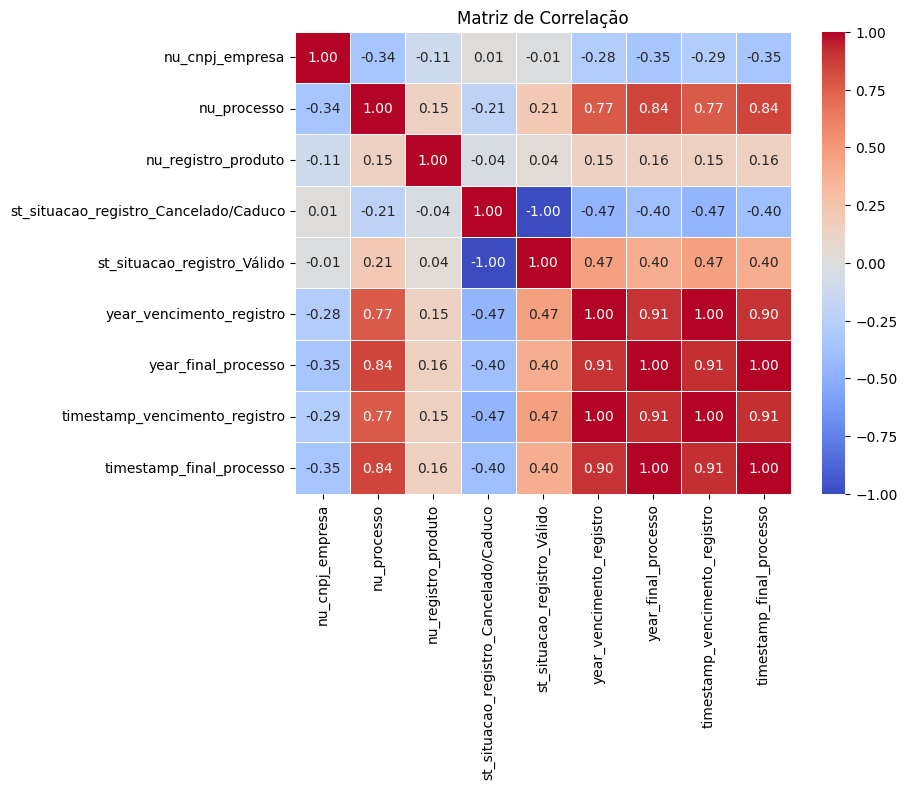

Mean Squared Error: 0.04533320621603585
R2 Score: -0.18206433248880738
Mean Absolute Error: 8.593526551625512
Root Mean Squared Error (RMSE): 0.21291596045396843


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

# df_dados_abertos_alimentos['year_vencimento_registro'] = df_dados_abertos_alimentos['dt_vencimento_registro'].dt.year
# df_dados_abertos_alimentos['year_final_processo'] = df_dados_abertos_alimentos['dt_finalizacao_processo'].dt.year


X = df_dados_abertos_alimentos[['year_final_processo', 'nu_processo', 'nu_registro_produto', 'year_vencimento_registro']]
y = df_dados_abertos_alimentos[['st_situacao_registro_Válido']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


# Treinando o modelo KNN
k = 5  # Número de vizinhos
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Realizando previsões
y_pred = knn_model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Plotando matriz de correlação
corr_matrix = df_dados_abertos_alimentos.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

### Inferindo os resultados

Os resultados da análise revelam uma acurácia geral de 95%, o que sugere um bom desempenho do modelo em prever corretamente as classes. No entanto, ao examinarmos a matriz de confusão, notamos que o modelo tende a classificar predominantemente a classe majoritária (0), resultando em um alto número de verdadeiros negativos (19895) e falsos positivos (245), enquanto os verdadeiros positivos (132) e falsos negativos (706) para a classe minoritária (1) são relativamente baixos.

Ao observar o relatório de classificação, percebemos que a precisão para a classe 1 (st_situacao_registro_Válido) é notavelmente baixa, indicando que o modelo tem dificuldade em identificar corretamente os casos positivos. A recall e f1-score também são baixas para a classe 1, sugerindo uma performance limitada na identificação desses casos. Esse desequilíbrio nas métricas pode ser atribuído à disparidade no número de amostras entre as classes, com uma grande maioria de exemplos pertencendo à classe 0.

Quanto às métricas de erro, o Mean Squared Error (MSE) é baixo, indicando uma boa concordância entre as previsões do modelo e os valores reais. No entanto, o R2 Score negativo sugere que o modelo não está performando melhor do que um modelo ingênuo. O Mean Absolute Error (MAE) e o Root Mean Squared Error (RMSE) fornecem uma medida da magnitude dos erros, sendo o RMSE particularmente útil para entender a dispersão dos erros. Neste caso, a avaliação das métricas de erro sugere que o modelo pode não ser ideal para todas as situações, especialmente considerando o desafio de lidar com classes desbalanceadas.

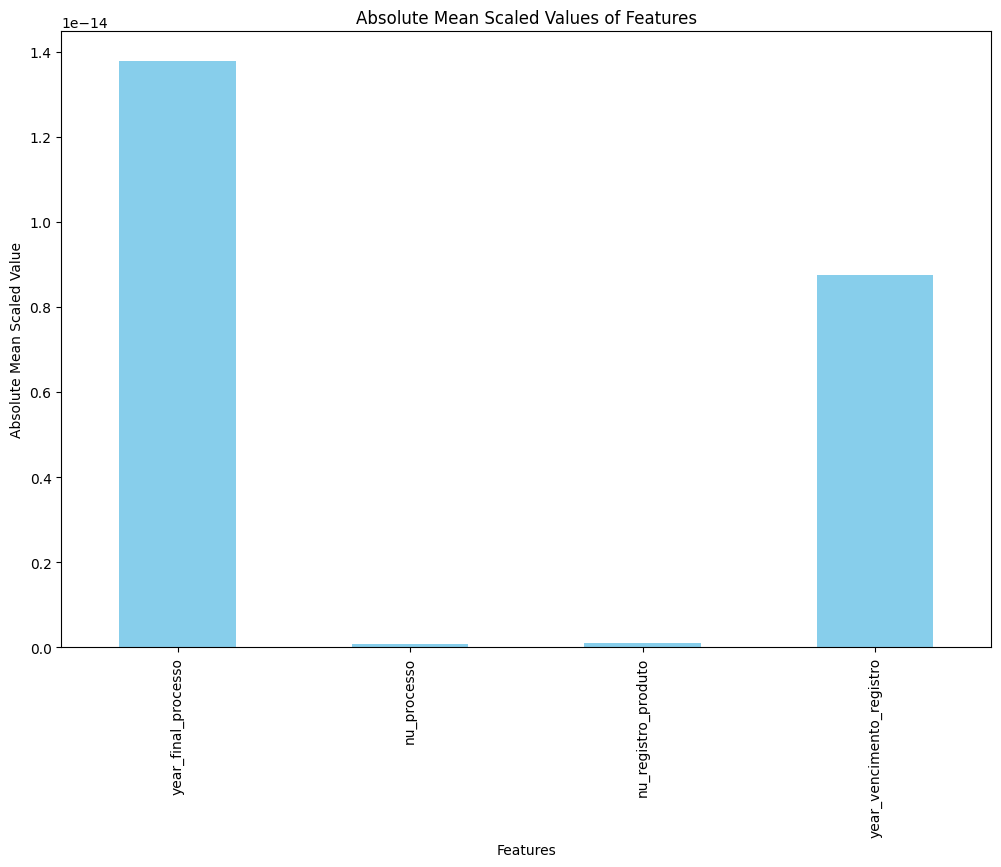

In [83]:
from sklearn.preprocessing import StandardScaler

# Assuming df_dados_abertos_alimentos is your DataFrame

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculate the absolute mean values of the scaled features
abs_mean_scaled_values = np.abs(scaled_df.mean())

# Plot a bar graph
plt.figure(figsize=(12, 8))
abs_mean_scaled_values.plot(kind='bar', color='skyblue')
plt.title("Absolute Mean Scaled Values of Features")
plt.xlabel("Features")
plt.ylabel("Absolute Mean Scaled Value")
plt.show()

### Tabelas utilizadas (segundo plano - focaremos mais na S5)



1.   POF Morador
2.   *POF Morador Qualidade de Vida (foi retirado depois)*



In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
df_dados_pof_morador['renda_disp_pc'] = pd.to_numeric(df_dados_pof_morador['renda_disp_pc'], errors='coerce')
df_dados_pof_morador['renda_monet_pc'] = pd.to_numeric(df_dados_pof_morador['renda_monet_pc'], errors='coerce')
df_dados_pof_morador['renda_nao_monet_pc'] = pd.to_numeric(df_dados_pof_morador['renda_nao_monet_pc'], errors='coerce')
df_dados_pof_morador['deducao_pc'] = pd.to_numeric(df_dados_pof_morador['deducao_pc'], errors='coerce')

# Replace NaN values with a default value if needed
default_value = 0  # You can change this to any default value
df_dados_pof_morador['renda_disp_pc'].fillna(default_value, inplace=True)
df_dados_pof_morador['renda_monet_pc'].fillna(default_value, inplace=True)
df_dados_pof_morador['renda_nao_monet_pc'].fillna(default_value, inplace=True)
df_dados_pof_morador['deducao_pc'].fillna(default_value, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_dados_pof_morador is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to each column
df_dados_pof_morador['renda_disp_pc'] = label_encoder.fit_transform(df_dados_pof_morador['renda_disp_pc'])
df_dados_pof_morador['renda_monet_pc'] = label_encoder.fit_transform(df_dados_pof_morador['renda_monet_pc'])
df_dados_pof_morador['renda_nao_monet_pc'] = label_encoder.fit_transform(df_dados_pof_morador['renda_nao_monet_pc'])
df_dados_pof_morador['deducao_pc'] = label_encoder.fit_transform(df_dados_pof_morador['deducao_pc'])

In [ ]:
df_dados_pof_morador.dtypes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_pof_morador = df_dados_pof_morador[['renda_monet_pc', 'nivel_instrucao', 'renda_total', 'deducao_pc']]
y_pof_morador = df_dados_pof_morador[['renda_disp_pc']]

subset_size = 6000

X_pof_morador = X_pof_morador.head(subset_size)
y_pof_morador = y_pof_morador.head(subset_size)

X_train, X_test, y_train, y_test = train_test_split(X_pof_morador, y_pof_morador, test_size=0.8, random_state=42)


# Treinando o modelo KNN
k = 5  # Número de vizinhos
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Realizando previsões
y_pred = knn_model.predict(X_test)

# # Avaliando o modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

pof_morador_corr = df_dados_pof_morador[['uf', 'estrato_pof', 'renda_monet_pc', 'nivel_instrucao', 'renda_total', 'deducao_pc', 'renda_disp_pc']]

# Plotando matriz de correlação
corr_matrix = pof_morador_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

## Gradient Boosting Regressor


O Gradient Boosting Regressor é um algoritmo de aprendizado de máquina que faz parte da família de modelos ensemble, conhecida por combinar as previsões de vários estimadores base para melhorar a robustez e o desempenho geral do modelo. No contexto de problemas de regressão, o Gradient Boosting Regressor destaca-se por sua capacidade de criar modelos preditivos precisos e flexíveis.

A essência do algoritmo reside na construção iterativa de árvores de decisão, denominadas "árvores fracas", com base nos erros residuais dos modelos anteriores. Em cada iteração, o modelo identifica as áreas em que os erros são mais pronunciados e ajusta a próxima árvore de decisão para corrigir esses erros. Esse processo é repetido várias vezes, e as previsões de cada árvore são ponderadas e combinadas para formar a previsão final do modelo.

A utilização do Gradient Boosting Regressor em modelos ensemble, portanto, oferece uma abordagem eficaz para resolver problemas de regressão, destacando-se em cenários em que é necessário um alto nível de precisão e capacidade de lidar com dados complexos e não lineares.



1.   Dados da API
2.   Dados da POF



In [87]:
df_dados_da_api.dtypes

ID                     int64
CNPJ                   int64
Quantidade             int64
Produto               object
Data          datetime64[ns]
Preço                float64
Valor                  int64
dtype: object

In [88]:
df_dados_da_api['Produto'].unique()

array(['Vinho', 'Feijão', 'Pão de Forma', 'Ketchup', 'Tupperware',
       'Tênis', 'Sofá', 'Macarrão', 'Açucar', 'Refrigerante',
       'Monitor LED', 'Cobertor', 'Jogo de Videogame', 'Livro',
       'Salsicha', 'Detergente', 'Notebook', 'Chocolate', 'Oleo', 'Carne',
       'Molho de Tomate', 'Arroz', 'Cerveja', 'Teclado', 'Ventilador',
       'Sabão em Pó', 'Papel Higienico', 'Queijo', 'Batata Palha',
       'Mouse'], dtype=object)

Label Encoding

A coluna 'Produto' do DataFrame df_dados_da_api é selecionada, e o método fit_transform do LabelEncoder é aplicado a essa coluna. Esse método ajusta o encoder aos rótulos únicos presentes na coluna 'Produto' e, em seguida, transforma esses rótulos em números inteiros. O resultado é adicionado como uma nova coluna chamada 'Encoded_Labels' ao DataFrame.

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels, then add a new column to the DataFrame
df_dados_da_api['Encoded_Labels'] = label_encoder.fit_transform(df_dados_da_api['Produto'])

# Display the DataFrame with the new column
df_dados_da_api

,ID,CNPJ,Quantidade,Produto,Data,Preço,Valor,Encoded_Labels
0,12139,11418228000201,3,Vinho,2023-04-23,589.0,98,29
1,12140,41326845000159,7,Feijão,2023-04-23,591.0,83,8
2,12141,20411431000158,12,Pão de Forma,2023-04-23,914.0,70,19
3,12142,5659670000138,5,Ketchup,2023-04-23,986.0,16,10
4,12143,38255950000130,23,Tupperware,2023-04-23,532.0,71,26
...,...,...,...,...,...,...,...,...
33023,24534,35719231000134,24,Livro,2023-08-24,90.0,68,11
33024,24535,40490789000120,10,Batata Palha,2023-08-24,607.0,98,2
33025,24536,39512287000174,6,Oleo,2023-08-24,284.0,13,17
33026,24537,45510205000155,13,Detergente,2023-08-24,539.0,78,7


A coluna alvo para a predição é definida como 'Encoded_Labels', que provavelmente contém rótulos codificados numericamente. Além disso, são especificadas as features que serão utilizadas no modelo, como 'Preço', 'CNPJ', 'Valor' e 'Quantidade'.


As features (X2) e a coluna alvo (y2) são selecionadas a partir do DataFrame. Em seguida, um subconjunto dos dados é criado, contendo apenas as primeiras 10.000 linhas, para acelerar a execução do modelo durante testes e experimentos.

O conjunto de dados é dividido em conjuntos de treino e teste usando a função train_test_split do scikit-learn.

Um modelo de regressão Gradient Boosting é criado com 100 estimadores, taxa de aprendizado de 0.1, profundidade máxima das árvores igual a 3, e semente randômica definida como 42. O modelo é treinado com os conjuntos de treino.

O modelo é usado para fazer previsões no conjunto de teste, e em seguida, são calculadas as métricas de erro médio quadrático (mse) e R² (r2) para avaliar o desempenho do modelo.

A importância das features é obtida do modelo e visualizada em um gráfico de barras horizontal usando a biblioteca Matplotlib.

Mean Squared Error: 1.5113286003719124
R2 Score: 0.9801134460788865


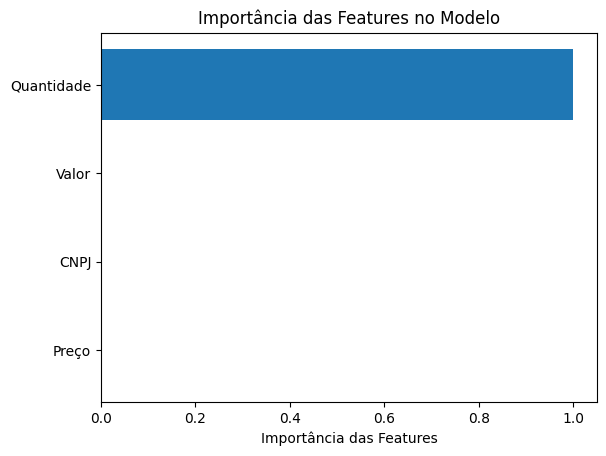

In [90]:
# Importando bibliotecas
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


coluna_alvo = 'Encoded_Labels'

# df_dados_caderneta[['renda_total']]

condicionantes_subgrupos = ["Preço", "CNPJ", "Valor", "Quantidade"]

X2 = df_dados_da_api[condicionantes_subgrupos]
y2 = df_dados_da_api[coluna_alvo]

subset_size_gradient = 10000

X2 = X2.head(subset_size_gradient)
y2 = y2.head(subset_size_gradient)

# Dividindo o conjunto de dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Gradient Boosting
modelo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Visualizando a importância das features
feature_importance = modelo.feature_importances_
feature_names = condicionantes_subgrupos

# Criando um gráfico de barras para visualizar a importância das features
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Importância das Features')
plt.title('Importância das Features no Modelo')
plt.show()

**Mean Squared Error (Erro Médio Quadrático):**

O MSE, com um valor de 1.511, é uma métrica que avalia a média dos quadrados das diferenças entre os valores reais e as previsões do modelo. Neste contexto, um MSE baixo é desejável, indicando que o modelo apresenta pequenos erros médios quadráticos nas previsões, o que sugere uma boa precisão na estimativa da variável resposta.

**R2 Score (Coeficiente de Determinação):**

O R² é uma métrica que varia de 0 a 1, representando a proporção da variabilidade na variável dependente que é explicada pelo modelo. Um R² próximo de 1 indica que o modelo explica uma porcentagem elevada da variabilidade dos dados. Com um valor de 0.98, o modelo de regressão Gradient Boosting demonstra uma capacidade notável de capturar os padrões subjacentes nos dados, evidenciando uma correlação forte entre as features e a variável alvo.

In [91]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.5 MB/s eta 0:00:00


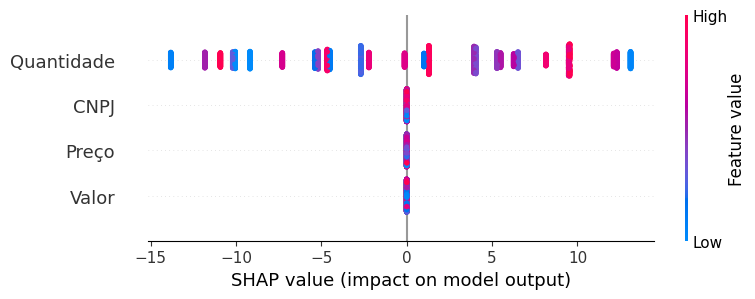

In [92]:
import shap

# Explicador SHAP
explainer = shap.TreeExplainer(modelo)

# Valores SHAP para uma amostra (pode escolher uma amostra específica do conjunto de teste)
shap_values = explainer.shap_values(X_test)

# Gráfico de resumo de SHAP
shap.summary_plot(shap_values, X_test)

A seleção de features mais importantes por parte do modelo de Gradient Boosting é determinada pela contribuição relativa de cada variável na redução do erro durante o treinamento. No caso, a feature "Quantidade" foi identificada como a mais importante com base na análise de importância de features realizada após o treinamento do modelo.